In [1]:
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv("data/fire_archive_V1_96617.csv")
df.head()

,latitude,longitude,bright_ti4,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_ti5,frp,type
0,-34.45902,150.88040,326.5,0.60,0.71,2019-08-01,246,N,VIIRS,n,1,290.7,5.8,3
1,-31.70724,151.07191,367.0,0.56,0.69,2019-08-01,247,N,VIIRS,h,1,291.9,10.4,0
2,-31.39626,149.65253,325.2,0.68,0.74,2019-08-01,247,N,VIIRS,n,1,292.7,5.6,0
3,-30.39774,152.06432,347.8,0.48,0.65,2019-08-01,247,N,VIIRS,n,1,287.6,9.1,0
4,-31.20248,151.89766,350.7,0.50,0.66,2019-08-01,247,N,VIIRS,n,1,292.3,9.4,0


## Task 1: Density Plots

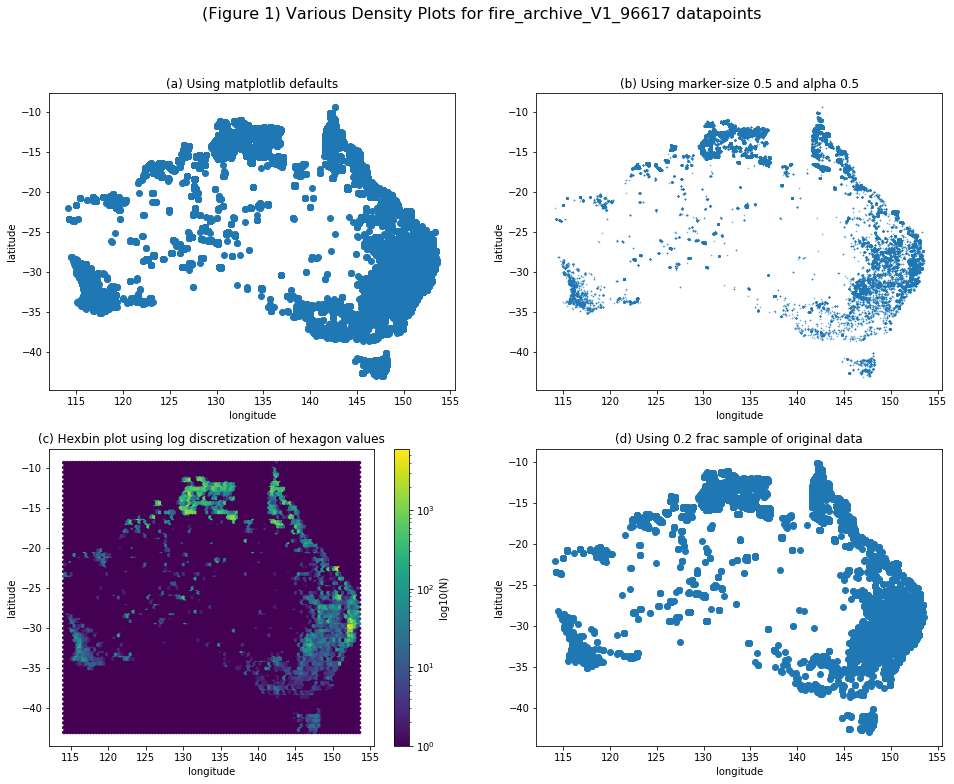

In [3]:
fig, ax = plt.subplots(2, 2, figsize=(16, 12))

# Figure Title
fig.suptitle("(Figure 1) Various Density Plots for fire_archive_V1_96617 datapoints", fontsize=16)

# 1. Matplotlib defaults
ax[0, 0].set_title("(a) Using matplotlib defaults")
ax[0, 0].set_xlabel("longitude")
ax[0, 0].set_ylabel("latitude")
ax[0, 0].scatter(df.longitude, df.latitude)

# 2: Adding alpha and marker size to compensate for overplotting.
ax[0, 1].set_title("(b) Using marker-size 0.5 and alpha 0.5")
ax[0, 1].set_xlabel("longitude")
ax[0, 1].set_ylabel("latitude")
ax[0, 1].scatter(df.longitude, df.latitude, alpha=0.5, s=0.5)

# 3: Hexbin plot
ax[1, 0].set_title("(c) Hexbin plot using log discretization of hexagon values")
ax[1, 0].set_xlabel("longitude")
ax[1, 0].set_ylabel("latitude")
hb = ax[1, 0].hexbin(df.longitude, df.latitude, bins="log")
cb = fig.colorbar(hb, ax = ax[1,0])
cb.set_label('log10(N)')


# 4: Subsampling the dataset
df_sample = df.sample(frac=0.2)
ax[1, 1].set_title("(d) Using 0.2 frac sample of original data")
ax[1, 1].set_xlabel("longitude")
ax[1, 1].set_ylabel("latitude")
ax[1, 1].scatter(df_sample.longitude, df_sample.latitude)

_ = plt.show()

### 1.2: Most anomalous regions 
From Figure 1.b and 1.c we can clearly see that most anomalies are located on **top-mid** (latitude (130-140), longitude (-17, -12)) and **right-mid** (latitude (150, 155), longitude (-35, -25)) section of Australia. 

## Task 2: Visualizing class membership

### 2.0 Distribution of brightness temperature I-4 as histogram

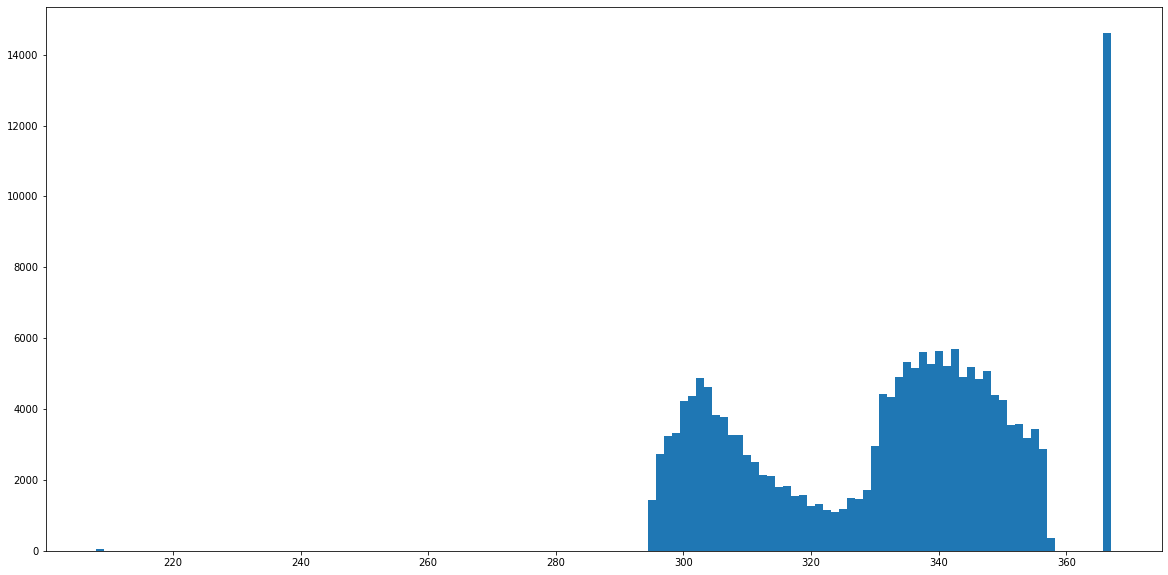

In [4]:
fig = plt.figure(figsize=(20, 10))
hist = plt.hist(df.bright_ti4, bins="auto")

We can clearly see that the bright_ti4 value is saturated at 367 (maximum value for sensor). If we observe this value for particular location, we can be sure that there is a fire, as the sensor has reached it's maximum.

### 2.1 Small multiples plot of whether the brightness is saturated

In [5]:
df_saturated = df.loc[df.bright_ti4 == 367, ["latitude", "longitude"]]
df_unsaturated = df.loc[df.bright_ti4 != 367, ["latitude", "longitude"]]

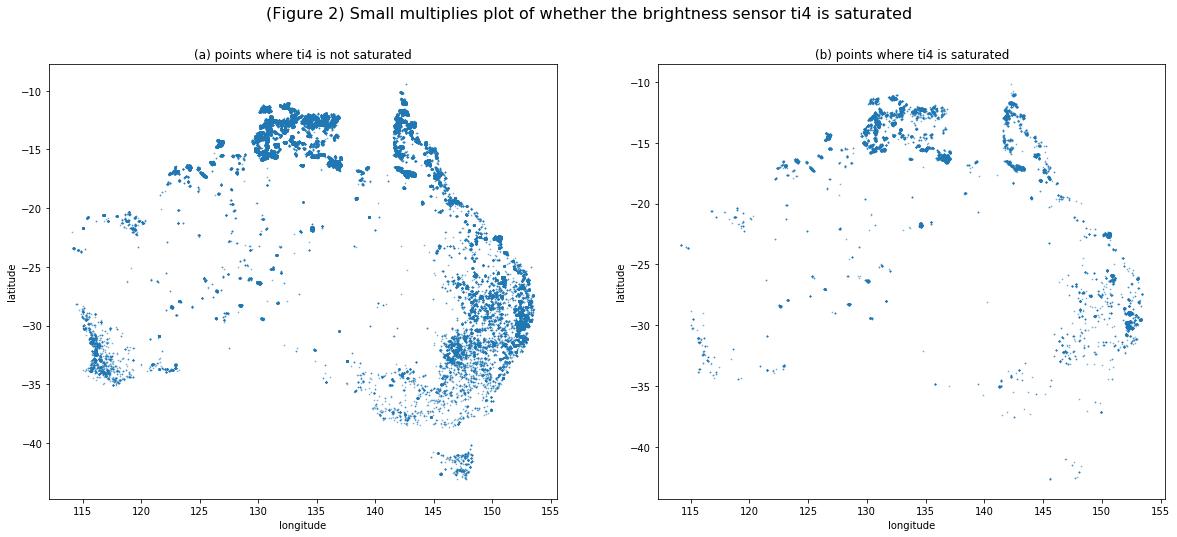

In [6]:
fig, ax = plt.subplots(1, 2, figsize=(20, 8))
fig.suptitle("(Figure 2) Small multiplies plot of whether the brightness sensor ti4 is saturated", fontsize=16)

ax[0].set_title("(a) points where ti4 is not saturated")
ax[0].set_xlabel("longitude")
ax[0].set_ylabel("latitude")
ax[0].scatter(df_unsaturated.longitude, df_unsaturated.latitude, s=0.5, alpha=0.5)

ax[1].set_title("(b) points where ti4 is saturated")
ax[1].set_xlabel("longitude")
ax[1].set_ylabel("latitude")
ax[1].scatter(df_saturated.longitude, df_saturated.latitude, s=0.5, alpha=0.5)

_ = plt.show()

We can see from Figure 2 that a lot more points are unsaturated than saturated. We can also observe that the locations where the density of unsaturated points is high also have saturated points indicating fire. 

### 2.2 Plot both groups in the same axes with different colors.

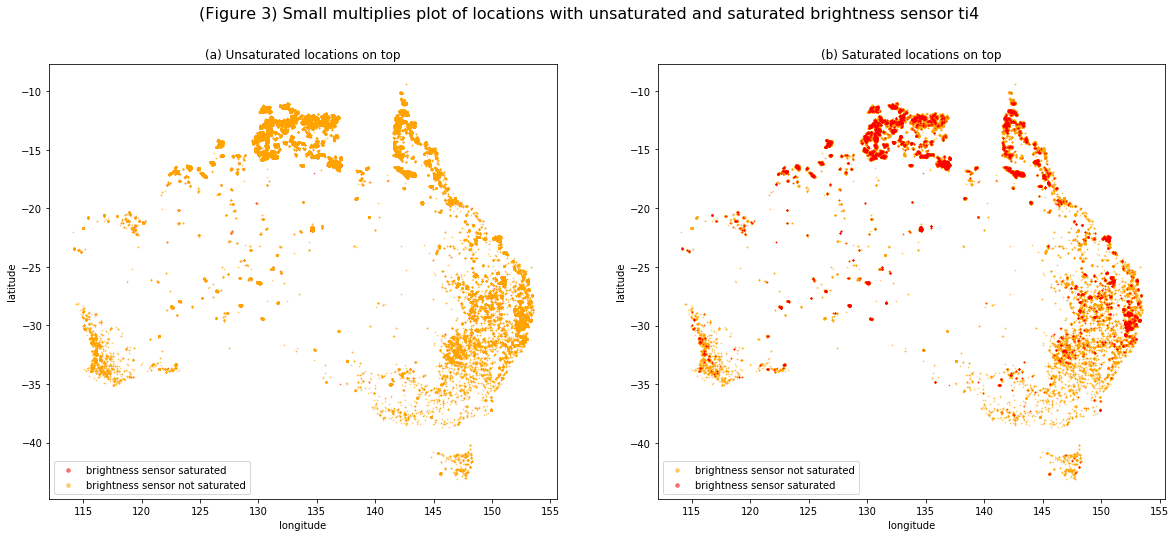

In [7]:
fig, ax = plt.subplots(1, 2, figsize=(20, 8))
fig.suptitle("(Figure 3) Small multiplies plot of locations with unsaturated and saturated brightness sensor ti4", fontsize=16)

ax[0].set_title("(a) Unsaturated locations on top")
ax[0].set_xlabel("longitude")
ax[0].set_ylabel("latitude")
ax[0].scatter(df_saturated.longitude, df_saturated.latitude, c='red', label="brightness sensor saturated", s=0.5, alpha=0.5)
ax[0].scatter(df_unsaturated.longitude, df_unsaturated.latitude, c='orange', label="brightness sensor not saturated", s=0.5, alpha=0.5)
ax[0].legend(markerscale=5, loc="lower left")

ax[1].set_title("(b) Saturated locations on top")
ax[1].set_xlabel("longitude")
ax[1].set_ylabel("latitude")
ax[1].scatter(df_unsaturated.longitude, df_unsaturated.latitude, c='orange', label="brightness sensor not saturated", s=0.5, alpha=0.5)
ax[1].scatter(df_saturated.longitude, df_saturated.latitude, c='red', label="brightness sensor saturated", s=0.5, alpha=0.5)
ax[1].legend(markerscale=5, loc="lower left")

_ = plt.show()

Looking at the Figure 3a, it seems like almost no locations have saturated brightness value, which is incorrect. Correct reprsentation would be Figure 3b.

### 2.3 Better way to compare two distributions

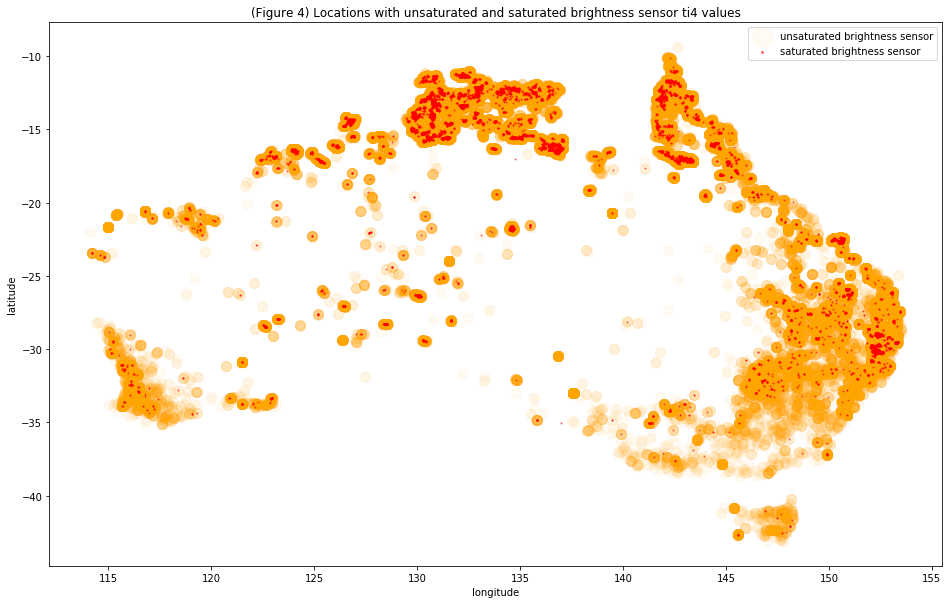

In [8]:
fig = plt.figure(figsize=(16, 10))
plt.title("(Figure 4) Locations with unsaturated and saturated brightness sensor ti4 values")
plt.xlabel("longitude")
plt.ylabel("latitude")
plt.scatter(df_unsaturated.longitude, df_unsaturated.latitude, c='orange', label="unsaturated brightness sensor", s=100, alpha=0.05)
plt.scatter(df_saturated.longitude, df_saturated.latitude, c='red', label="saturated brightness sensor", s=1, alpha=0.5)
plt.legend(markerscale=2)
plt.show()

Consider Figure 3b. If a location has similar amount of saturated and unsaturated observations, we will only see the saturated observation. In Figure 4, since the marker size of unsaturated observation is bigger, we can clearly see both the observations. Also note that, since the number of unsaturated observations is lot more than saturated observations, having smaller alpha for unsaturated makes sense.

### 2.3 Better way to compare two distributions (alternative)

In [9]:
from bokeh.plotting import figure, show, output_notebook
from bokeh.tile_providers import get_provider, Vendors
from pyproj import Proj, transform, Transformer
output_notebook()

Loading BokehJS ...

In [41]:
# Sample: Plotting a huge amount of points this way consumes a lot of RAM. Better sample.
df_saturated_sample = df_saturated.sample(5000)
df_unsaturated_sample = df_unsaturated.sample(5000)

# Convert lat-long to Mercator projection (required by library)
transformer = Transformer.from_crs("EPSG:4326", "EPSG:3857", always_xy=True)
sat_long, sat_lat = transformer.transform(df_saturated_sample.longitude.values, df_saturated_sample.latitude.values)
unsat_long, unsat_lat = transformer.transform(df_unsaturated_sample.longitude.values, df_unsaturated_sample.latitude.values)

tile_provider = get_provider(Vendors.CARTODBPOSITRON)
p = figure(
    x_range=(12500000, 17500000),
    y_range=(-5000000, -1000000),
    x_axis_type="mercator",
    y_axis_type="mercator",
    title="(Figure 5) Locations with unsaturated and saturated brightness sensor ti4 values",
)
p.add_tile(tile_provider)
p.xaxis.axis_label = "longitude"
p.yaxis.axis_label = "latitude"
p.circle(unsat_long, unsat_lat, size=10, color="orange", alpha=0.5, legend_label="unsaturated brightness sensor")
p.circle(sat_long, sat_lat, size=0.1, color="red", alpha=0.5, legend_label="saturated brightness sensor")
show(p)
# Following is an interactive plot. It might not be visible on github or in pdf format

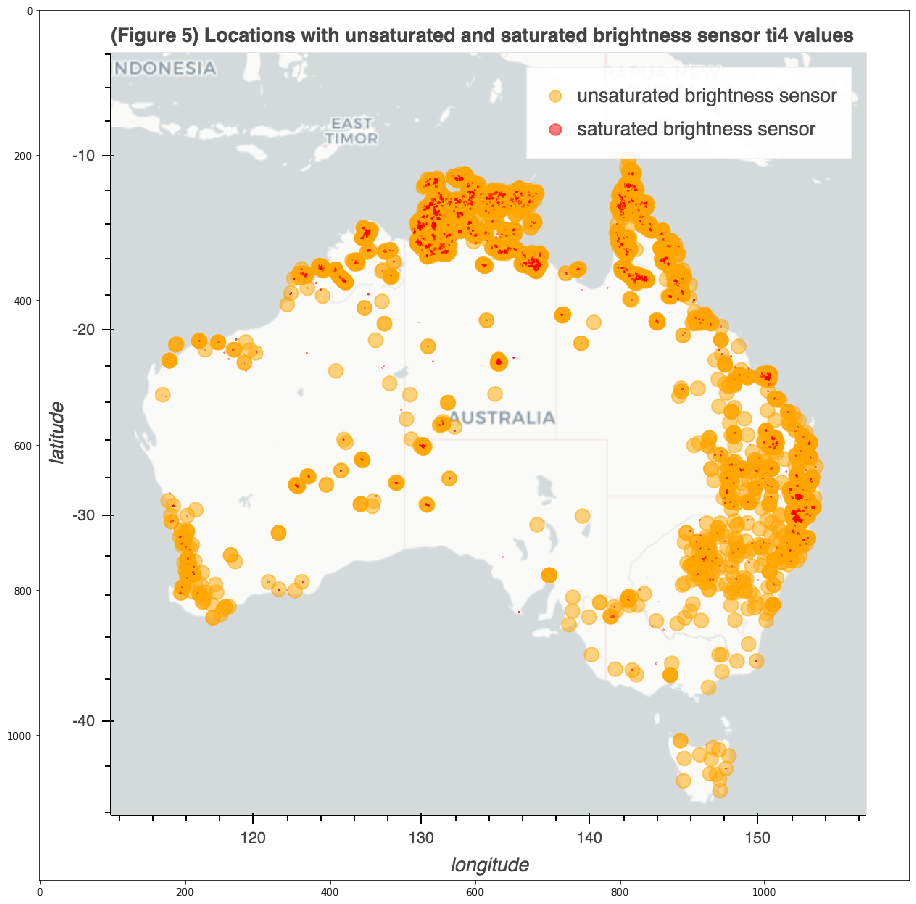

In [40]:
import matplotlib.image as mpimg
img = mpimg.imread('Fig5.png')
fig = plt.figure(figsize=(16, 16))
_ = plt.imshow(img)